### check to see if the proportion of ripples above 100ms are similar between groups

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
D:\ryanh\Anaconda3\envs\ripple_analysis\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
df_swr = pd.read_csv(r'F:\Projects\PAE_PlaceCell\analysis\swr_data\post_processed\swr_df.csv')
df_swr

,Unnamed: 0,ripple_number,start_time,end_time,ripple_duration,max_emg,peak_time,peak_channel,peak_amplitude,peak_freq,clipped,session,area,ep_type,group,rat
0,0,22,211.247200,211.327200,0.080000,0.990871,211.296000,3,5.566472,213.605249,0.000000,LEM3116_S20180715121821,ca1,track,control,LEM3116
1,1,60,517.919200,518.311200,0.392000,0.995188,518.087200,7,29.168512,203.155556,0.000000,LEM3116_S20180715121821,ca1,track,control,LEM3116
2,2,72,607.938400,608.326400,0.388000,0.990928,607.964000,3,7.932019,103.616382,0.000000,LEM3116_S20180715121821,ca1,track,control,LEM3116
3,3,80,675.985600,676.139200,0.153600,0.994272,676.074400,7,5.077734,173.913383,0.000000,LEM3116_S20180715121821,ca1,track,control,LEM3116
4,4,100,933.226400,933.424000,0.197600,0.992893,933.278400,7,27.285162,119.721685,0.000000,LEM3116_S20180715121821,ca1,pedestal_2,control,LEM3116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18199,18728,25,255.450400,255.599200,0.148800,0.314032,255.533600,7,8.094016,105.746020,0.000000,RH16_S20161126145021,ca1,track,pae,RH16
18200,18729,22,149.384000,149.505600,0.121600,0.133732,149.436800,6,12.060743,186.017137,0.000000,RH16_S20161126150318,ca1,track,pae,RH16
18201,18730,32,233.419200,233.576000,0.156800,0.260312,233.496000,7,8.145433,110.793201,0.000000,RH16_S20161126150318,ca1,track,pae,RH16
18202,18731,36,270.288000,270.410400,0.122400,0.065024,270.328800,0,4.390508,174.380797,0.000000,RH16_S20161126150318,ca1,track,pae,RH16


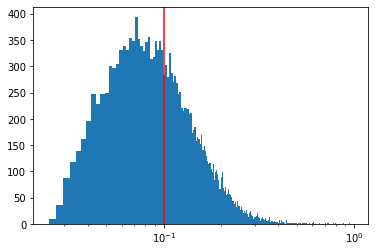

In [20]:
plt.hist(df_swr.ripple_duration,400)
plt.axvline(.1,color='r')
plt.xscale('log')
plt.show()

In [26]:

print(sum(df_swr.ripple_duration[(df_swr.group == 'control') & (df_swr.area=='ca3')] >= .1) /
      sum((df_swr.group == 'control') & (df_swr.area=='ca3')))

print(sum(df_swr.ripple_duration[(df_swr.group == 'pae') & (df_swr.area=='ca3')] >= .1) /
      sum((df_swr.group == 'pae') & (df_swr.area=='ca3')))

0.6004273504273504
0.438490150158424


In [4]:
def add_group_affiliation(df):
    control=('RH13','RH14','LS21','LS23','LE2821','LE2823','LEM3116','LEM3120','LEM3216')
    pae=('RH11','RH16','LS17','LS19','LE2813','LEM3124','LEM3206','LEM3246')

    df['group'] = np.ones_like(df.session)

    regstr = '|'.join(control)
    idx = df['session'].str.upper().str.contains(regstr)    
    df.loc[idx, "group"] = 'control'

    regstr = '|'.join(pae)
    idx = df['session'].str.upper().str.contains(regstr)    
    df.loc[idx, "group"] = 'pae'
    return df

In [13]:
# remove non-HPC
df_swr = df_swr[(df_swr.area == 'ca1') | (df_swr.area == 'ca3')]

# get combo of session and area because one rat as tetrodes in multiple areas
df_swr['session_area'] = df_swr.session+df_swr.area

n_rip = []
prop_above = []

# loop through each unique session/area id
for session in pd.unique(df_swr.session_area):
    # how many ripples in current session?
    n_rip.append(sum(df_swr.session_area == session))
    # in current session, how many ripples above 100ms?
    n_rip_above = sum(df_swr.ripple_duration[df_swr.session_area == session]>=0.100)
    # get proportion
    prop_above.append(n_rip_above / n_rip[-1])
    
df_prop = pd.DataFrame()

df_prop['session'] = pd.unique(df_swr.session_area)

rat = [s.split('_')[0] for s in df_prop.session]
df_prop['rat'] = rat
df_prop = add_group_affiliation(df_prop)
df_prop['area'] = df_prop.session.map(lambda x: str(x)[-3:])
df_prop['session'] = df_prop.session.map(lambda x: str(x)[:-3])

df_prop['n_rip'] = n_rip
df_prop['prop_above'] = prop_above

df_prop.n_rip = pd.to_numeric(df_prop.n_rip, downcast='integer')

display(df_prop)


df_prop.to_csv(r'F:\Projects\PAE_PlaceCell\analysis\swr_data\post_processed\df_prop_100ms.csv')


<ipython-input-13-e93906874595>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swr['session_area'] = df_swr.session+df_swr.area


,session,rat,group,area,n_rip,prop_above
0,LEM3116_S20180715121821,LEM3116,control,ca1,11,0.818182
1,LEM3116_S20180715160836,LEM3116,control,ca1,40,0.875000
2,LEM3116_S20180716115155,LEM3116,control,ca1,7,0.571429
3,LEM3116_S20180716174306,LEM3116,control,ca1,31,0.645161
4,LEM3116_S20180717110938,LEM3116,control,ca1,438,0.374429
...,...,...,...,...,...,...
199,RH16_S20161021165052,RH16,pae,ca1,1,0.000000
200,RH16_S20161030145324,RH16,pae,ca1,5,0.600000
201,RH16_S20161126145021,RH16,pae,ca1,1,1.000000
202,RH16_S20161126150318,RH16,pae,ca1,3,1.000000
